    Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import os
import random
import tensorflow as tf
import cv2
import shutil
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
%matplotlib inline

    Visulaiser mes images 

        Plastic_clean

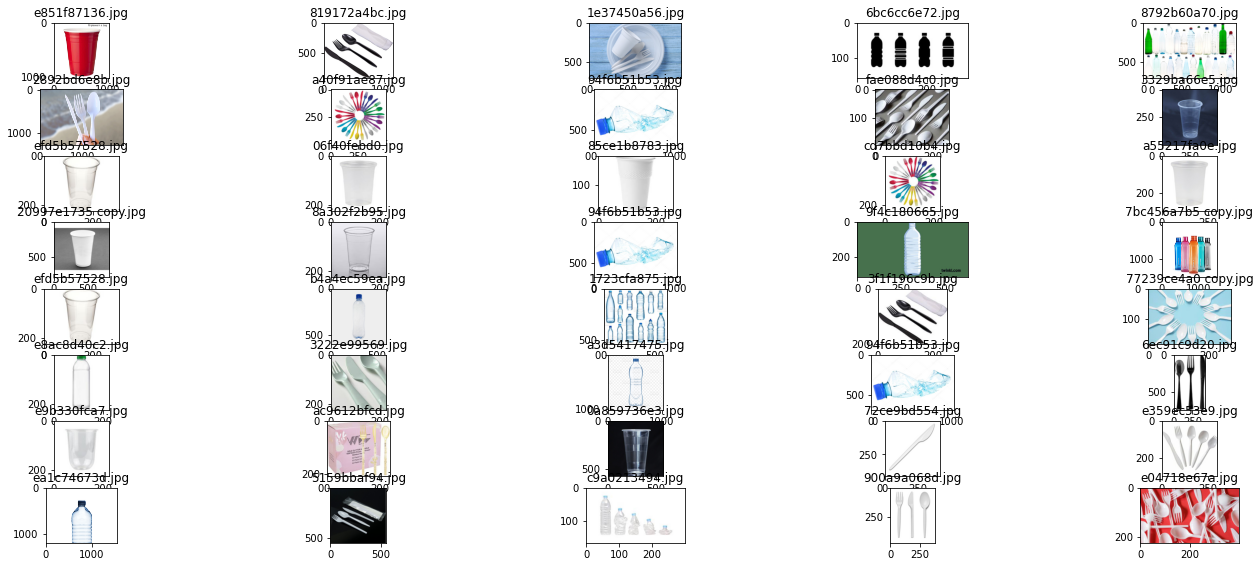

In [2]:
plt.figure(figsize=(24,12))
test_folder='/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/training_set/plastic_clean'
for i in range(40):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(10,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

        Plastic_dirty

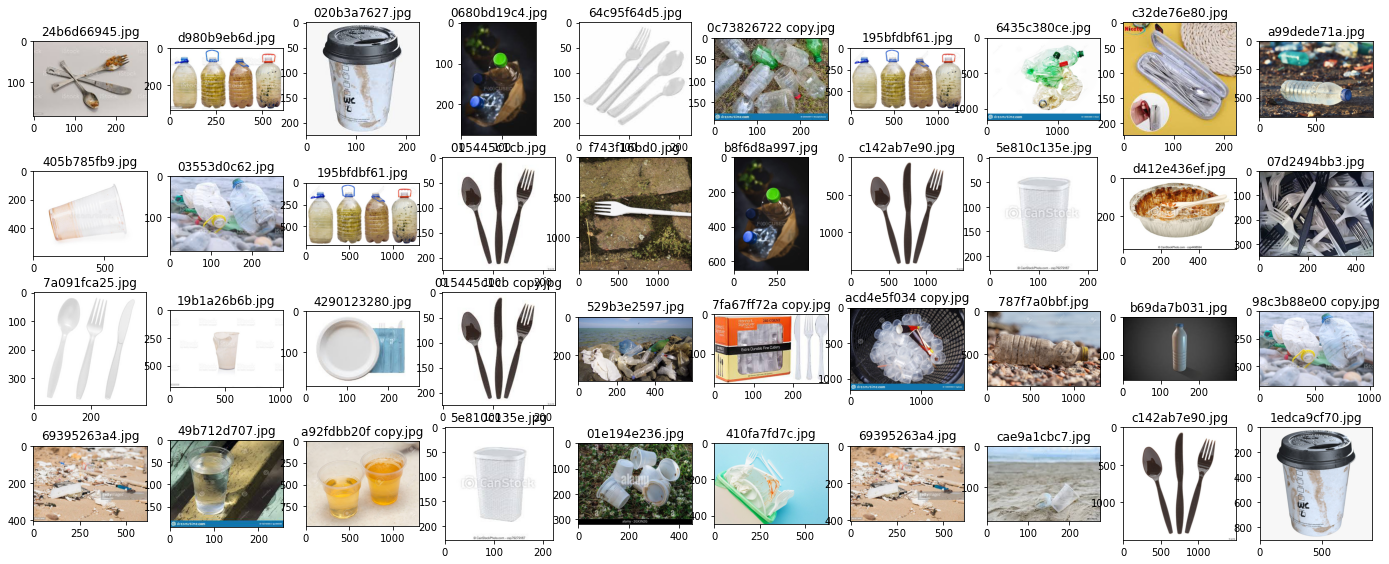

In [3]:
plt.figure(figsize=(24,12))
test_folder='/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/training_set/plastic_dirty'
for i in range(40):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(5,10,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

    Redimensionner les images

In [4]:
IMG_WIDTH = 64
IMG_HEIGHT = 64
img_folder = "/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/"

    Déplacer les images scrappées vers la dataset correspondante

In [5]:
# Define the source and destination path
source = "/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/images/"
destination = "/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/"
  
# code to move the files from sub-folder to main folder.
files = os.listdir(source)
for file in files:
    file_name = os.path.join(source, file)
    shutil.move(file_name, destination)
print("Files Moved")

Files Moved


    Creation de dataset pour chacun des labels de plastic pour le trainning set

In [6]:
def create_dataset(img_folder):
   
    img_data_array_train=[]
    class_name_train=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array_train.append(image)
            class_name_train.append(dir1)
    return img_data_array_train, class_name_train

# extract the image array and class name
img_data_train, class_name_train =create_dataset("/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/training_set/")

    Creation de dataset pour chacun des labels de plastic pour le test set

In [7]:
def create_dataset(img_folder):
   
    img_data_array_test=[]
    class_name_test=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array_test.append(image)
            class_name_test.append(dir1)
    return img_data_array_test, class_name_test

# extract the image array and class name
img_data_test, class_name_test =create_dataset("/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set/")

    Convertir the class name en valeur unique binaire

In [8]:
target_dict_train={k: v for v, k in enumerate(np.unique(class_name_train))}
target_dict_train

{'plastic_clean': 0, 'plastic_dirty': 1}

In [9]:
target_dict_test={k: v for v, k in enumerate(np.unique(class_name_test))}
target_dict_test

{'plastic_clean': 0, 'plastic_dirty': 1}

    Convertir chaque class name avec leurs valeurs respectives

In [10]:
target_val_train=  [target_dict_train[class_name_train[i]] for i in range(len(class_name_train))]
len(target_val_train)

450

In [11]:
target_val_test=  [target_dict_test[class_name_test[i]] for i in range(len(class_name_test))]
len(target_val_test)

150

Creation de la matrice et le vecteur y

In [12]:
X_train = np.array(img_data_train)
y_train = np.vstack(target_val_train)
X_test = np.array(img_data_test)
y_test = np.vstack(target_val_test)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(450, 64, 64, 3) (450, 1) (150, 64, 64, 3) (150, 1)


    Creation de la data tranning et datatest

    Sauvegarde de la  dataset d'entrainenment dans le folder arrays

In [13]:
np.save('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/arrays/X_train', X_train)
np.save('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/arrays/y_train', y_train)
np.save('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/arrays/X_test', X_test)
np.save('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/arrays/y_test', y_test)

    Creation de model du deep learning et son entrainement

In [14]:
# Librairies
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

        L'architecture: Construction du réseau étape par étape

In [15]:
# 0. Initialisation
classifier = Sequential()

# 1. La Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# 2. Le Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Ajout d'une couche de convolution/pooling supplémentaire
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# 3. Le Flattening
classifier.add(Flatten())

# 4. La couche fully-connected
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Paramètres d'entraînement
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

2022-05-04 14:23:00.639908: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


        L'entrainement du modèle

In [16]:
# On génère de nouvelles images de training supplémentaires avec ImageDataGenerator
# qui au passage gère le preprocessing de l'image (notamme le rescaling)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_generator = train_datagen.flow_from_directory('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 30,
                                                 class_mode = 'binary')

test_generator = test_datagen.flow_from_directory('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 30,
                                            class_mode = 'binary')

history1 = classifier.fit(training_generator,
               steps_per_epoch = 15, #450/30
               epochs = 20,
               validation_data = test_generator,
               validation_steps = 5) #150/30

Found 450 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Epoch 1/20


2022-05-04 14:23:00.885282: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


15/15 [==============================] - 3s 217ms/step - loss: 0.8275 - accuracy: 0.5088 - val_loss: 0.7130 - val_accuracy: 0.4733
Epoch 2/20
15/15 [==============================] - 3s 182ms/step - loss: 0.6479 - accuracy: 0.6479 - val_loss: 0.5875 - val_accuracy: 0.7400
Epoch 3/20
15/15 [==============================] - 3s 186ms/step - loss: 0.5871 - accuracy: 0.6871 - val_loss: 0.6386 - val_accuracy: 0.5333
Epoch 4/20
15/15 [==============================] - 3s 185ms/step - loss: 0.5637 - accuracy: 0.6997 - val_loss: 0.5534 - val_accuracy: 0.7133
Epoch 5/20
15/15 [==============================] - 3s 181ms/step - loss: 0.5566 - accuracy: 0.7240 - val_loss: 0.4620 - val_accuracy: 0.8333
Epoch 6/20
15/15 [==============================] - 3s 187ms/step - loss: 0.4490 - accuracy: 0.8139 - val_loss: 0.5155 - val_accuracy: 0.8067
Epoch 7/20
15/15 [==============================] - 3s 181ms/step - loss: 0.4407 - accuracy: 0.7786 - val_loss: 0.4011 - val_accuracy: 0.8733
Epoch 8/20
15/15 

    Augmentation des Epochs en restant sur le même jeu de données 

In [17]:
# On génère de nouvelles images de training supplémentaires avec ImageDataGenerator
# qui au passage gère le preprocessing de l'image (notamme le rescaling)
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

# training_generator = train_datagen.flow_from_directory('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/training_set',
#                                                  target_size = (64, 64),
#                                                  batch_size = 30,
#                                                  class_mode = 'binary')

# test_generator = test_datagen.flow_from_directory('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set',
#                                             target_size = (64, 64),
#                                             batch_size = 30,
#                                             class_mode = 'binary')

# history1 = classifier.fit(training_generator,
#                steps_per_epoch = 15, #450/30
#                epochs = 30,
#                validation_data = test_generator,
#                validation_steps = 5) #150/30

    Visualisation du modèle

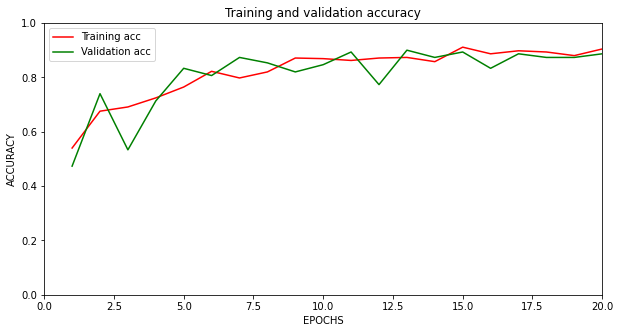

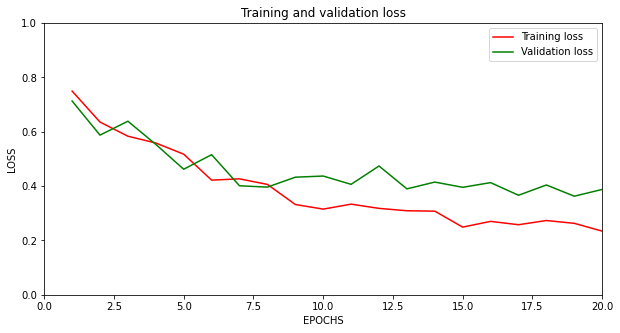

In [18]:

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.legend()
plt.xlim(0,20)
plt.ylim(0,1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend()
plt.xlim(0,20)
plt.ylim(0,1)
plt.show()

    Sauvegarde du modele

In [19]:
classifier.save('model_trained.h5')

    Evaluation du modèle

In [20]:
classifier.evaluate(test_generator)

5/5 [==============================] - 1s 101ms/step - loss: 0.3877 - accuracy: 0.8867


[0.387677401304245, 0.8866666555404663]

    Prédictions

In [21]:
# Nouvelle prédiction
import numpy as np
from keras.preprocessing import image

def new_prediction(path):
    test_image = image.load_img(path, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    #training_set.class_indices

    if result[0][0] == 0:
        return 'plastic_clean'
    else:
        return 'plastic_dirty'

In [22]:
new_prediction('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set/plastic_clean/1d42a308b0.jpg'), new_prediction('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set/plastic_dirty/24b6d66945.jpg')

('plastic_clean', 'plastic_dirty')

Visulisation

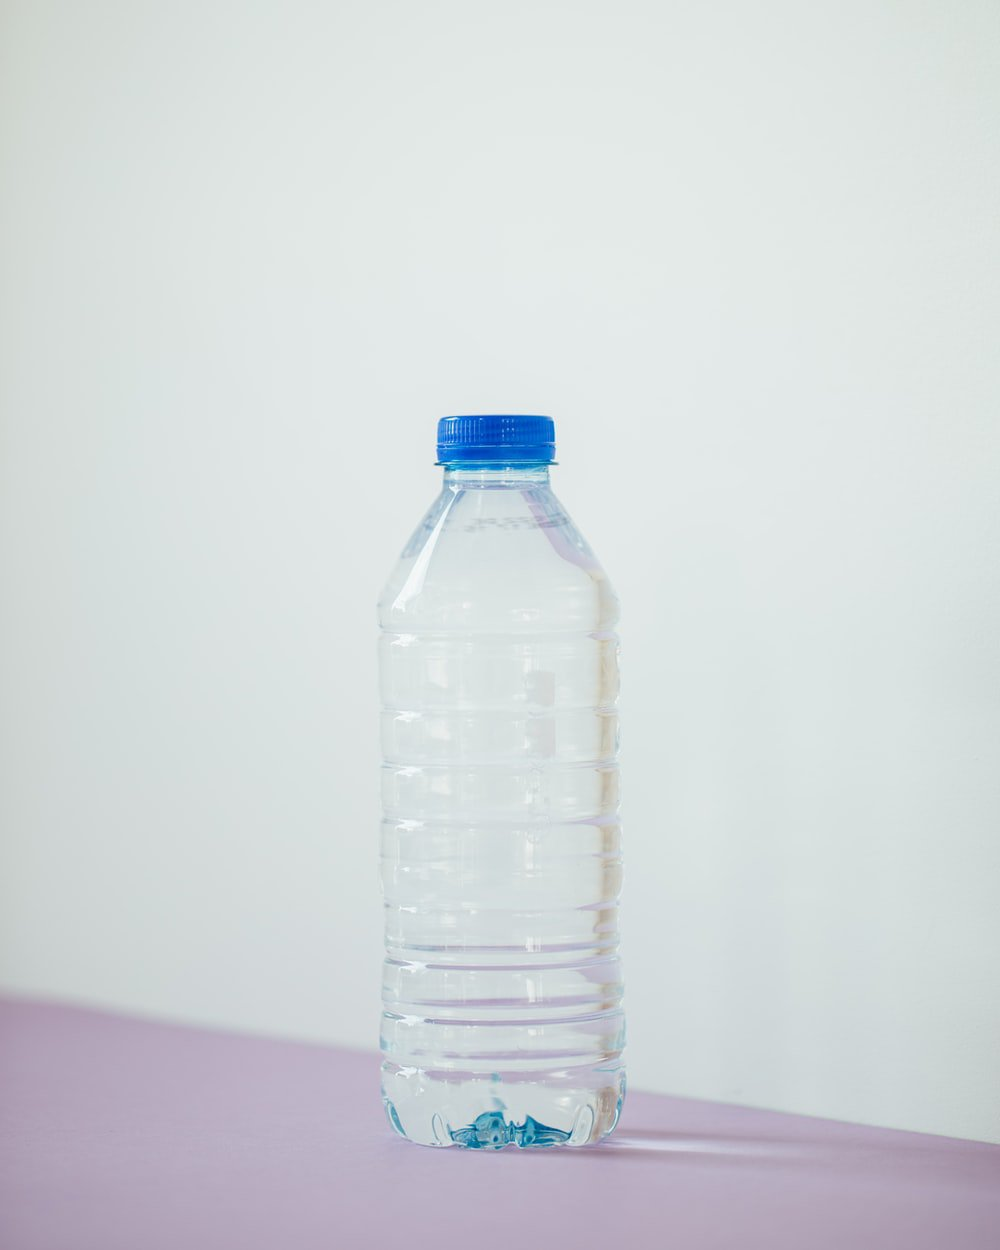

In [23]:
from IPython.display import Image 
Image(filename='/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set/plastic_clean/1d42a308b0.jpg', width=200)

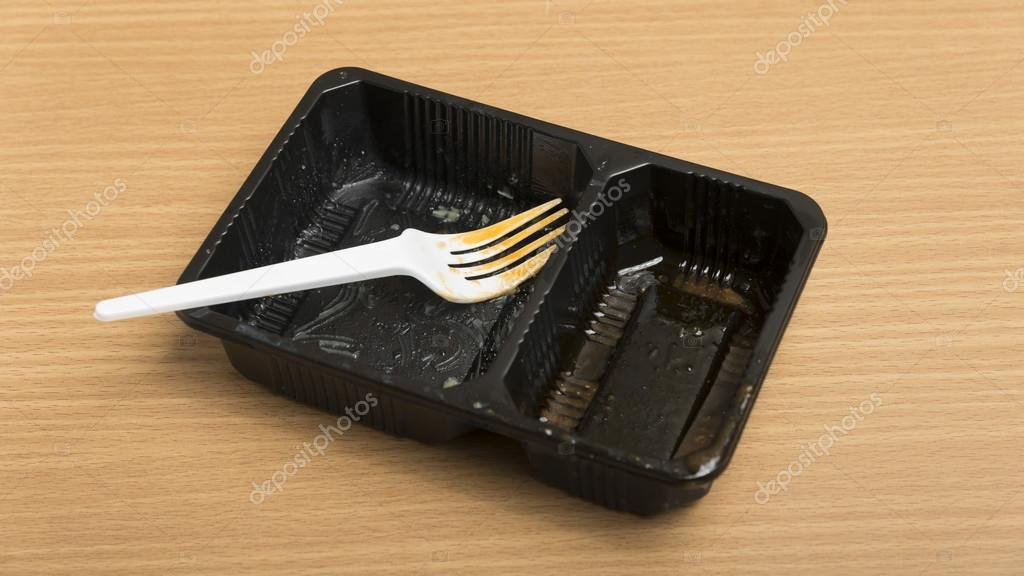

In [24]:
Image(filename='/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set/plastic_dirty/1ec8383d5c.jpg', width=200)

    Amélioration de votre modèle

    1er cas:     Data Augmentation : concerne que les données entrainés

In [25]:
augmented_datagen = ImageDataGenerator(
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')

    Visualisation des images de la dataaugmentation

        Entrainer à nouveau le modèle

In [26]:
# On génère de nouvelles images de training supplémentaires avec ImageDataGenerator
# qui au passage gère le preprocessing de l'image (notamme le rescaling)
augmented_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 brightness_range=[0.8,1.2],
 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_generator = augmented_datagen.flow_from_directory('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 30,
                                                 class_mode = 'binary')

test_generator = test_datagen.flow_from_directory('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 30,
                                            class_mode = 'binary')

history2 = classifier.fit(training_generator,
               steps_per_epoch = 15, #450/30
               epochs = 20,
               validation_data = test_generator,
               validation_steps = 5) #150/30

Found 450 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Epoch 1/20
15/15 [==============================] - 3s 205ms/step - loss: 0.5227 - accuracy: 0.7844 - val_loss: 0.3797 - val_accuracy: 0.8667
Epoch 2/20
15/15 [==============================] - 3s 192ms/step - loss: 0.5227 - accuracy: 0.7533 - val_loss: 0.3792 - val_accuracy: 0.8800
Epoch 3/20
15/15 [==============================] - 3s 195ms/step - loss: 0.4536 - accuracy: 0.8222 - val_loss: 0.3674 - val_accuracy: 0.8667
Epoch 4/20
15/15 [==============================] - 3s 195ms/step - loss: 0.3984 - accuracy: 0.8378 - val_loss: 0.3597 - val_accuracy: 0.8600
Epoch 5/20
15/15 [==============================] - 3s 203ms/step - loss: 0.3826 - accuracy: 0.8422 - val_loss: 0.3449 - val_accuracy: 0.8800
Epoch 6/20
15/15 [==============================] - 3s 193ms/step - loss: 0.3854 - accuracy: 0.8267 - val_loss: 0.3495 - val_accuracy: 0.8600
Epoch 7/20
15/15 [==============================] - 3s 196ms/step 

    Sauvegarde du modèle

In [27]:
classifier.save('model_trained_aug.h5')

    Evaluation du modèle

In [28]:
classifier.evaluate(test_generator)

5/5 [==============================] - 1s 118ms/step - loss: 0.3303 - accuracy: 0.8733


[0.33027076721191406, 0.8733333349227905]

    Visualisation du modèle avec la datagaugmentation

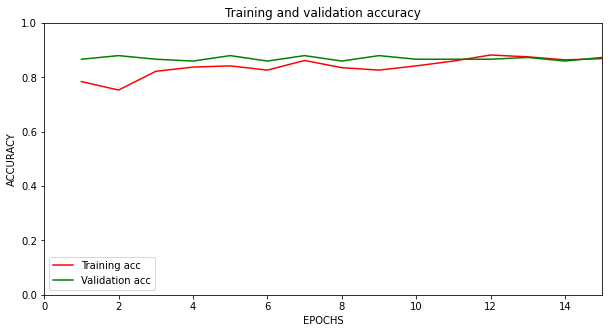

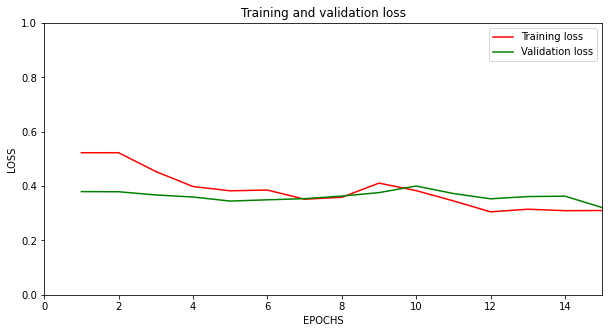

In [29]:

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.legend()
plt.xlim(0,15)
plt.ylim(0,1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend()
plt.xlim(0,15)
plt.ylim(0,1)
plt.show()

       2e cas:     Transfer Learning

In [30]:
# Voilà à quoi ressemble le modèle VGG16 full
from keras.applications.vgg16 import VGG16
vgg16 = VGG16(weights='imagenet')
print(vgg16.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

    Comme modèle de base , j'ai pris le modèle initiale pour mettre en place le transfer learning

        Modele du transfer Learning

In [31]:
# On va s'en servir comme modèle de base pour notre modèle : c'est le principe du transfer learning
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

# Définition du modèle VGG16
classifier_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# On définit les couches cachées comme non entraînables
#(on pourrait les réentrainer ou choisir de ne réentrainer que les premières par exemple)
for layer in classifier_vgg16.layers:
    layer.trainable = False

# Ajout de nouvelles couches spécifiques à notre problème de classification
flat = Flatten()(classifier_vgg16.output)
classif = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat)
output = Dense(1, activation='sigmoid')(classif)

classifier_vgg16 = Model(inputs=classifier_vgg16.inputs, outputs=output)

classifier_vgg16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        Entrainement du modèle

In [32]:
# Entraînement
training_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 30,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/Users/enyonadjanor/IA-P2-Euskadi-Enyon/Projets/Projet P8 - Triof/triof/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 30,
                                            class_mode = 'binary')

history3 =classifier_vgg16.fit(training_set,
                     steps_per_epoch = 15, #8000/32
                     epochs = 20,
                     validation_data = test_set,
                     validation_steps = 5) #2000/32=62.5

Found 450 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Epoch 1/20
15/15 [==============================] - 16s 1s/step - loss: 0.6142 - accuracy: 0.6295 - val_loss: 0.3664 - val_accuracy: 0.8200
Epoch 2/20
15/15 [==============================] - 16s 1s/step - loss: 0.4064 - accuracy: 0.8044 - val_loss: 0.3557 - val_accuracy: 0.8400
Epoch 3/20
15/15 [==============================] - 16s 1s/step - loss: 0.2834 - accuracy: 0.8795 - val_loss: 0.2280 - val_accuracy: 0.9133
Epoch 4/20
15/15 [==============================] - 16s 1s/step - loss: 0.2293 - accuracy: 0.9124 - val_loss: 0.2322 - val_accuracy: 0.9067
Epoch 5/20
15/15 [==============================] - 16s 1s/step - loss: 0.2179 - accuracy: 0.9024 - val_loss: 0.1965 - val_accuracy: 0.9133
Epoch 6/20
15/15 [==============================] - 16s 1s/step - loss: 0.1637 - accuracy: 0.9367 - val_loss: 0.1934 - val_accuracy: 0.9333
Epoch 7/20
15/15 [==============================] - 16s 1s/step - loss: 0.1677

    Sauvegarde du modèle

In [33]:
classifier_vgg16.save('model_tl')

2022-05-04 14:30:22.398865: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_tl/assets


    Evaluation du modèle

In [34]:
classifier_vgg16.evaluate(test_generator)

5/5 [==============================] - 4s 747ms/step - loss: 0.1103 - accuracy: 0.9733


[0.1103406623005867, 0.9733333587646484]

    Comparaison des modeles

(0.0, 21.0)

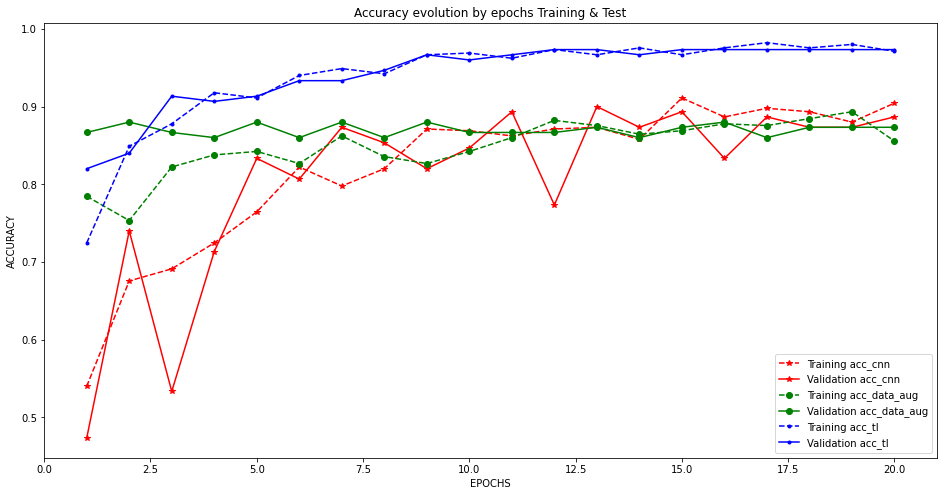

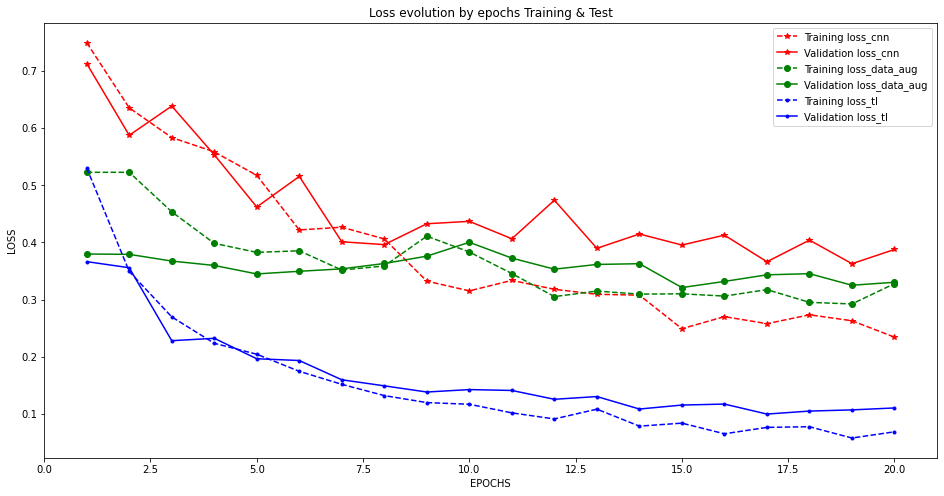

In [35]:
acc_cnn = history1.history['accuracy']
acc_aug = history2.history['accuracy']
acc_tl = history3.history['accuracy']

val_acc_cnn = history1.history['val_accuracy']
val_acc_aug = history2.history['val_accuracy']
val_acc_tl = history3.history['val_accuracy']

loss_cnn = history1.history['loss']
loss_aug = history2.history['loss']
loss_tl = history3.history['loss']

val_loss_cnn = history1.history['val_loss']
val_loss_aug = history2.history['val_loss']
val_loss_tl = history3.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(16, 8))
plt.plot(epochs, acc_cnn, 'r--', label='Training acc_cnn', marker='*')
plt.plot(epochs, val_acc_cnn, 'r', label='Validation acc_cnn', marker='*')

plt.plot(epochs, acc_aug, 'g--', label='Training acc_data_aug', marker='o')
plt.plot(epochs, val_acc_aug, 'g', label='Validation acc_data_aug',  marker='o')

plt.plot(epochs, acc_tl, 'b--', label='Training acc_tl', marker='.')
plt.plot(epochs, val_acc_tl, 'b', label='Validation acc_tl',  marker='.')


plt.title("Accuracy evolution by epochs Training & Test")
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.legend()
plt.xlim(0,21)

plt.figure(figsize=(16, 8))
plt.plot(epochs, loss_cnn, 'r--', label='Training loss_cnn', marker='*')
plt.plot(epochs, val_loss_cnn, 'r', label='Validation loss_cnn', marker='*')

plt.plot(epochs, loss_aug, 'g--', label='Training loss_data_aug', marker='o')
plt.plot(epochs, val_loss_aug, 'g', label='Validation loss_data_aug',  marker='o')

plt.plot(epochs, loss_tl, 'b--', label='Training loss_tl', marker='.')
plt.plot(epochs, val_loss_tl, 'b', label='Validation loss_tl',  marker='.')


plt.title("Loss evolution by epochs Training & Test")
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend()
plt.xlim(0,21)